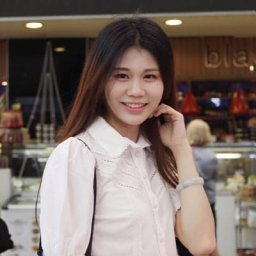
# Joyce (Yanru) Jiang

# Transformability, Generalizability, but Limited Diffusibility Comparing Global vs. Task-Specific Language Representations in Deep Neural Networks

# https://www.sciencedirect.com/science/article/pii/S1389041723001183

---

## Abstract

This paper examines how **global language representations** derived from large pre-trained transformer models and **task-specific representations** learned by recurrent neural networks can be integrated within a single hybrid system. By employing autoencoders to transform and diffuse representations between BERT and LSTM embedding spaces, the authors identify a fundamental computational constraint termed **limited diffusibility**. While global representations can be effectively transformed into task-specific formats, the reverse transformation is severely constrained. Empirical results demonstrate that global knowledge is essential for generalization across tasks, whereas reliance on purely task-specific representations substantially limits transferability.

---

## Transformability

Transformability refers to the extent to which one representational form can be mapped into another without catastrophic loss of information. The paper investigates whether representations learned under fundamentally different learning regimes can be aligned through learned transformations.

---

## Problems

The study addresses three core problems:

1. Whether fundamentally different language representations (global versus task-specific) can be transformed or merged into a shared representational space.

2. Whether intermediate, *diffused* representations preserve meaningful information from both representational systems.

3. Whether transformed or diffused representations improve generalization to unseen tasks compared to task-specific models alone.

---

## Transformability

A central hypothesis is that representational alignment is not symmetric. Even if two systems perform well on the same task, the internal structure of their representations may obey fundamentally different informational constraints.

---

## Proposed Solutions

The authors propose a hybrid modeling framework that:

- Treats transformer-based embeddings as **global representations** and LSTM embeddings as **task-specific representations**.
- Uses convolutional autoencoders to learn bidirectional transformations:
  - BERT → LSTM  
  - LSTM → BERT
- Evaluates intermediate bottleneck representations as *diffused* forms that potentially combine both global and task-specific knowledge.

---

## Transformability

The framework allows empirical testing of whether representational richness can be compressed, expanded, or diffused across model classes, revealing inherent asymmetries in representational capacity.

---

## Purpose

The purpose of the study is to characterize the computational feasibility, asymmetry, and limitations of integrating global and task-specific language representations, and to assess their respective contributions to **transferability** and **generalization** in downstream tasks.

---

## Transformability

This analysis reframes transfer learning not as parameter reuse, but as a representational transformation problem governed by information-theoretic constraints.

---

## Methodology

- Emotion-labeled tweets are encoded using:
  - A pre-trained BERT model (global representations)
  - A trained LSTM classifier (task-specific representations)
- Two Conv1D autoencoders are trained to transform embeddings between BERT and LSTM spaces.
- Representational Similarity Analysis (RSA) is applied to quantify structural alignment across representations.
- All representations are evaluated on a separate hate-speech classification task using a standardized two-layer classifier to assess generalization.

---

## Transformability

The methodology isolates representational effects by controlling the downstream classifier, ensuring that observed differences arise from representation quality rather than model capacity.

---

## Results

- BERT embeddings exhibit weak categorical structure but strong generalization performance.
- LSTM embeddings encode clear task-specific emotional categories but generalize poorly.
- Transformation is asymmetric:
  - BERT → LSTM conversion is effective.
  - LSTM → BERT conversion fails to recover global structure.
- Bottleneck (diffused) representations retain limited but useful global information even at very low dimensionality.
- Models containing any degree of global knowledge consistently outperform purely task-specific systems on the transfer task.

---

## Transformability

These results indicate that task-specific representations collapse information in ways that cannot be reversed, even with expressive transformation models.

---

## Conclusions

The study concludes that hybrid systems integrating global and task-specific representations face intrinsic informational constraints. Global representations are dense, high-entropy, and transferable, while task-specific representations are sparse and resistant to upward transformation. This asymmetry, termed **limited diffusibility**, explains why global knowledge is critical for generalization. The findings support complementary learning theories and highlight the necessity of global representations in adaptive cognitive and artificial systems.


# Mathematical Formulation in the Paper

## 1. Vector Representations (Embeddings)

### High-Dimensional Embeddings

- **BERT embeddings:**  
  $$\mathbf{e}^{\text{BERT}} \in \mathbb{R}^{768}$$

- **LSTM embeddings:**  
  $$\mathbf{e}^{\text{LSTM}} \in \mathbb{R}^{300}$$

### Role in the Paper

These vectors are treated as mathematical representations of sentence meaning. The entire study analyzes how information behaves when mapped between vector spaces of different dimensionality and structure.

### Key Idea

Higher dimensionality corresponds to higher information capacity and entropy, while lower dimensionality corresponds to compressed, task-optimized information:

$$
\text{Entropy}(\text{BERT}) > \text{Entropy}(\text{LSTM})
$$

---

## 2. Autoencoder Formulation

### Autoencoder Structure

An autoencoder consists of:

- **Encoder:**  
  $$f_{\text{enc}} : \mathbb{R}^n \rightarrow \mathbb{R}^k$$

- **Decoder:**  
  $$f_{\text{dec}} : \mathbb{R}^k \rightarrow \mathbb{R}^m$$

Given an input vector:
$$
\mathbf{x} \in \mathbb{R}^n
$$

The transformation is:
$$
\mathbf{z} = f_{\text{enc}}(\mathbf{x}), \quad \hat{\mathbf{x}} = f_{\text{dec}}(\mathbf{z})
$$

### Role in the Paper

Autoencoders are used to mathematically test whether one representational space can be transformed into another or diffused into an intermediate form.

---

## 3. Bottleneck Dimensionality

### Bottleneck Sizes Tested

$$
k \in \{32, 64, 128, 256\}
$$

### Role in the Paper

The bottleneck dimension acts as an explicit information constraint, limiting how much structure can pass between representations.

### Key Finding

Increasing $k$ improves reconstruction quality slightly, but does not eliminate directional asymmetry, revealing a structural limitation rather than a capacity limitation.

---

## 4. Reconstruction Loss (Mean Squared Error)

### Loss Function

For a $d$-dimensional target representation:
$$
\mathcal{L}_{\text{MSE}} = \sum_{i=1}^{d} (x_i - \hat{x}_i)^2
$$

### Role in the Paper

This loss measures numerical reconstruction fidelity between source and target embeddings.

### Interpretation

Low reconstruction loss does **not** imply semantic equivalence; it only reflects geometric proximity in vector space.

---

## 5. Convolutional Autoencoder Operations

### Conv1D Parameters

- Kernel size: $3$
- Stride: $2$
- Padding: $1$

### Role in the Paper

Convolution enforces locality by aggregating neighboring embedding dimensions:
$$
\mathbf{h}_{i} = \sum_{j=i-1}^{i+1} w_j \cdot \mathbf{x}_j
$$

### Consequence

This operation favors sequence-structured representations (LSTM) and degrades dense global representations (BERT), contributing to asymmetric transformability.

---

## 6. Representational Similarity Analysis (RSA)

### Cosine Similarity

For two embeddings $\mathbf{a}, \mathbf{b}$:
$$
\cos(\theta) = \frac{\mathbf{a} \cdot \mathbf{b}}{\|\mathbf{a}\| \, \|\mathbf{b}\|}
$$

### Similarity Matrix

For $N = 300$ sampled sentences:
$$
S_{ij} = \cos(\mathbf{e}_i, \mathbf{e}_j)
$$

Resulting in:
$$
\mathbf{S} \in \mathbb{R}^{300 \times 300}
$$

### Role

The similarity matrix encodes the geometric structure of a representation space.

---

## 7. Pearson Correlation Between Representations

### Pearson Correlation Coefficient

Given flattened similarity matrices $X$ and $Y$:
$$
r = \frac{\sum (X - \bar{X})(Y - \bar{Y})}
{\sqrt{\sum (X - \bar{X})^2} \sqrt{\sum (Y - \bar{Y})^2}}
$$

### Role in the Paper

Pearson correlation compares representational geometry across spaces.

### Key Result

$$
r(\text{BERT} \rightarrow \text{LSTM}) \gg r(\text{LSTM} \rightarrow \text{BERT})
$$

This quantitatively defines **limited diffusibility**.

---

## 8. Training Dynamics Across Epochs

### Correlation Trajectories

During training, the paper tracks:
$$
r(\mathbf{z}, \mathbf{x}_{\text{input}}), \quad r(\mathbf{z}, \mathbf{x}_{\text{output}})
$$

### Role

These trajectories show how information migrates during optimization.

### Finding

Information loss is irreversible when moving from sparse to dense representational spaces.

---

## 9. Dimensionality Reduction for Visualization (t-SNE)

### Mapping

$$
\mathbb{R}^d \rightarrow \mathbb{R}^2
$$

### Role

Used for qualitative visualization of clustering patterns.

### Mathematical Note

t-SNE preserves local neighborhood probabilities rather than global geometry, which is why RSA is required for quantitative analysis.

---

## 10. Classification Models and Loss

### Cross-Entropy Loss

For classification:
$$
\mathcal{L}_{\text{CE}} = - \sum y \log(\hat{y})
$$

### Role

Measures generalization performance when embeddings are transferred to hate-speech classification.

---

## 11. Statistical Testing

### Independent t-Tests

Performance comparisons are conducted over 25 runs.

### Significance Levels

$$
p < 0.001, \quad p < 0.01, \quad p < 0.05
$$

### Role

Establishes that observed performance differences are statistically meaningful.

---

## 12. Information-Theoretic Interpretation

### Implicit Entropy Gradient

Although entropy is not explicitly computed, the analysis relies on:
$$
\text{Entropy}_{\text{BERT}} > \text{Entropy}_{\text{LSTM}}
$$

### Role

Explains why information flows easily from BERT to LSTM but not in reverse. This entropy gradient is the mathematical basis of **limited diffusibility**.

---

## Core Mathematical Insight (Summary)

The paper demonstrates, using vector spaces, reconstruction loss, similarity metrics, and correlation statistics, that:

- Information transfer between representations is directional  
- Dimensional compression is feasible; dimensional expansion is not  
- Semantic generalization requires high-entropy global representations  
- Bottleneck diffusion cannot overcome intrinsic information gradients  

These conclusions are mathematically grounded in geometry, statistics, and information flow rather than model heuristics.


| Key problems / research gaps identified | How these issues limit prior work | How the paper proposes to solve them |
|---|---|---|
| Lack of a unified computational account for integrating **global** language knowledge (pre-trained transformers) with **task-specific** representations (RNN/LSTM trained for a particular task). | Prior approaches typically privilege either broad generalization (global models) or strong task specialization (local models), making it difficult to explain or engineer systems that can coherently combine both representational regimes. | Construct a hybrid modeling framework using BERT as a global learner and LSTM as a task-specific learner, then explicitly test integration through representational transformation and fusion via autoencoders. |
| Uncertainty about whether distinct representational systems are transformable into each other or diffusable into a shared space. | Without a principled way to map between representational formats, “hybrid” architectures risk becoming ad hoc pipelines where components cannot meaningfully exchange information. | Train two directional autoencoders (BERT → LSTM and LSTM → BERT) and treat bottleneck embeddings as *diffused* representations and reconstructions as *transformed* representations, enabling empirical tests of both transformability and diffusibility. |
| Lack of evidence on which representational regime (global vs. task-specific vs. transformed/diffused) best supports transfer to a new task. | Prior evaluations often conflate in-task performance with generalization; this obscures whether task-specific structure actually transfers and whether global knowledge is the principal driver of cross-task robustness. | Evaluate six representation systems (LSTM, BERT, two bottlenecks, two reconstructions) on a different downstream task (hate-speech classification) using consistent classifiers, allowing a direct comparison of transferability across representational sources. |
| Limited understanding of constraints in hybrid systems—especially directional asymmetries in information flow between sparse task-optimized embeddings and dense global embeddings (*limited diffusibility*). | Without identifying such constraints, integration attempts may assume symmetric interchangeability between representations, leading to unrealistic expectations about “upgrading” task-specific embeddings into globally informative ones. | Use autoencoder-based transformations to reveal a systematic asymmetry: transformation is more effective when compressing from a denser (global) system to a sparser (task-specific) one than vice versa, formalized as *limited diffusibility*. |
| Need for a computational bridge between cognitive *multiple-systems* theories (complementary global vs. local learning) and modern deep learning representations. | Prior theorizing may remain conceptually persuasive but computationally underspecified; conversely, engineering practice may not explicitly test representational compatibility or integration limits relevant to cognition. | Frame BERT and LSTM as concrete instantiations of global vs. task-specific systems and use representational transformation plus transfer evaluation to operationalize and quantify integration limits and benefits. |
| Empirical ambiguity about whether *diffused* bottleneck spaces can retain useful global knowledge under severe compression. | If compressed intermediates cannot preserve globally useful signal, hybrid designs that rely on small shared bottlenecks may fail to deliver transfer gains in realistic settings. | Demonstrate that representations containing BERT information (including BERT → LSTM bottlenecks as small as 32 dimensions) still yield improved downstream performance relative to purely task-specific LSTM representations. |


In [1]:
# Hybrid "Global vs Task-Specific" Representations + Autoencoder Transformation + Transfer Task
# -----------------------------------------------------------------------------

import re
import math
import random
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [2]:
# ----------------------------
# 0) Reproducibility & device
# ----------------------------
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Device: cuda


In [3]:
# -----------------------------------------
# 1) Tiny synthetic datasets (teachable)
# -----------------------------------------

emotion_labels = ["anger", "fear", "joy", "love", "sadness", "surprise"]
emo2id = {e:i for i,e in enumerate(emotion_labels)}

emotion_templates = {
    "anger": [
        "i am furious about this", "this makes me so angry", "i hate what happened", "im mad at you",
        "this is unacceptable and enraging"
    ],
    "fear": [
        "i am scared right now", "this is terrifying", "im afraid of the outcome", "i feel anxious today",
        "this worries me a lot"
    ],
    "joy": [
        "i am so happy", "this is wonderful news", "im feeling great today", "what a fantastic day",
        "i feel joyful and excited"
    ],
    "love": [
        "i love you so much", "you mean the world to me", "im grateful for your kindness", "sending love and hugs",
        "my heart is full of love"
    ],
    "sadness": [
        "i feel so sad", "this is heartbreaking", "im down today", "i miss you and feel lonely",
        "i feel depressed and tired"
    ],
    "surprise": [
        "i did not expect this", "wow that surprised me", "that was shocking news", "unexpected and amazing",
        "im astonished by this"
    ],
}

# Hate-speech transfer dataset (binary)
# Keep it simple and safe: no slurs, no targeting protected groups; just "hateful tone" vs neutral.
hate_templates = {
    1: [
        "i hate you", "you are disgusting", "go away i despise you", "you are awful and i cant stand you",
        "i want you to fail"
    ],
    0: [
        "have a nice day", "thanks for your help", "lets work together", "i appreciate your effort",
        "this is a neutral statement"
    ]
}

def build_dataset(templates, n_per_class=150, label_map=None):
    texts, labels = [], []
    for label, sents in templates.items():
        for _ in range(n_per_class):
            sent = random.choice(sents)
            # Add mild random noise: extra words, punctuation, synonyms
            noise = random.choice(["", "", "", " really", " today", " honestly", " so much", " !!!", " ..."])
            sent = sent + noise
            texts.append(sent)
            labels.append(label_map[label] if label_map else label)
    # Shuffle
    idx = list(range(len(texts)))
    random.shuffle(idx)
    texts = [texts[i] for i in idx]
    labels = [labels[i] for i in idx]
    return texts, labels

emotion_texts, emotion_y = build_dataset(emotion_templates, n_per_class=180, label_map=emo2id)
hate_texts, hate_y = build_dataset(hate_templates, n_per_class=240, label_map=None)

# Train/val/test splits
def split(texts, labels, train=0.8, val=0.1):
    n = len(texts)
    n_train = int(train*n)
    n_val = int(val*n)
    X_train, y_train = texts[:n_train], labels[:n_train]
    X_val, y_val = texts[n_train:n_train+n_val], labels[n_train:n_train+n_val]
    X_test, y_test = texts[n_train+n_val:], labels[n_train+n_val:]
    return (X_train, y_train), (X_val, y_val), (X_test, y_test)

(em_trX, em_trY), (em_vaX, em_vaY), (em_teX, em_teY) = split(emotion_texts, emotion_y)
(hs_trX, hs_trY), (hs_vaX, hs_vaY), (hs_teX, hs_teY) = split(hate_texts, hate_y)

print(f"Emotion samples: train={len(em_trX)}, val={len(em_vaX)}, test={len(em_teX)}")
print(f"Hate samples:    train={len(hs_trX)}, val={len(hs_vaX)}, test={len(hs_teX)}")

Emotion samples: train=864, val=108, test=108
Hate samples:    train=384, val=48, test=48


In [4]:
# -----------------------------------------
# 2) Tokenization + Vocabulary
# -----------------------------------------

def tokenize(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s']", " ", text)  # keep alnum + apostrophe
    toks = text.split()
    return toks

# Build vocab from BOTH tasks (so global model sees more language variety)
all_texts = em_trX + em_vaX + em_teX + hs_trX + hs_vaX + hs_teX
freq = {}
for t in all_texts:
    for w in tokenize(t):
        freq[w] = freq.get(w, 0) + 1

# Special tokens
PAD, UNK, CLS = "<pad>", "<unk>", "<cls>"
vocab = {PAD:0, UNK:1, CLS:2}
for w, c in sorted(freq.items(), key=lambda x: -x[1]):
    if w not in vocab:
        vocab[w] = len(vocab)

id2tok = {i:w for w,i in vocab.items()}
vocab_size = len(vocab)
print("Vocab size:", vocab_size)

def encode(text, max_len=24):
    toks = [CLS] + tokenize(text)
    ids = [vocab.get(w, vocab[UNK]) for w in toks][:max_len]
    attn = [1]*len(ids)
    # pad
    while len(ids) < max_len:
        ids.append(vocab[PAD])
        attn.append(0)
    return ids, attn

Vocab size: 102


In [5]:
# -----------------------------------------
# 3) Datasets / DataLoaders
# -----------------------------------------
class TextDataset(Dataset):
    def __init__(self, X, y, max_len=24):
        self.X = X
        self.y = y
        self.max_len = max_len
    def __len__(self):
        return len(self.X)
    def __getitem__(self, i):
        ids, attn = encode(self.X[i], self.max_len)
        return (
            torch.tensor(ids, dtype=torch.long),
            torch.tensor(attn, dtype=torch.float32),
            torch.tensor(self.y[i], dtype=torch.long),
            self.X[i]
        )

BATCH = 32
MAX_LEN = 24

em_train_loader = DataLoader(TextDataset(em_trX, em_trY, MAX_LEN), batch_size=BATCH, shuffle=True)
em_val_loader   = DataLoader(TextDataset(em_vaX, em_vaY, MAX_LEN), batch_size=BATCH, shuffle=False)
em_test_loader  = DataLoader(TextDataset(em_teX, em_teY, MAX_LEN), batch_size=BATCH, shuffle=False)

hs_train_loader = DataLoader(TextDataset(hs_trX, hs_trY, MAX_LEN), batch_size=BATCH, shuffle=True)
hs_val_loader   = DataLoader(TextDataset(hs_vaX, hs_vaY, MAX_LEN), batch_size=BATCH, shuffle=False)
hs_test_loader  = DataLoader(TextDataset(hs_teX, hs_teY, MAX_LEN), batch_size=BATCH, shuffle=False)

In [6]:
# -----------------------------------------
# 4) "Global" model: Lightweight Transformer Encoder
# -----------------------------------------

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=512):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)  # (1, max_len, d_model)
        self.register_buffer("pe", pe)
    def forward(self, x):
        # x: (B, T, D)
        return x + self.pe[:, :x.size(1), :]

class GlobalTransformer(nn.Module):
    def __init__(self, vocab_size, d_model=128, nhead=4, num_layers=2, dim_ff=256, num_classes=6, max_len=24):
        super().__init__()
        self.emb = nn.Embedding(vocab_size, d_model, padding_idx=vocab[PAD])
        self.pos = PositionalEncoding(d_model, max_len=max_len+5)
        enc_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dim_feedforward=dim_ff, batch_first=True)
        self.encoder = nn.TransformerEncoder(enc_layer, num_layers=num_layers)
        self.classifier = nn.Linear(d_model, num_classes)
        self.d_model = d_model

    def forward(self, ids, attn):
        # ids: (B,T), attn: (B,T) with 1 for real tokens, 0 for pad
        x = self.emb(ids)  # (B,T,D)
        x = self.pos(x)
        # Transformer expects a key_padding_mask with True at PAD positions
        key_padding_mask = (attn == 0)
        h = self.encoder(x, src_key_padding_mask=key_padding_mask)  # (B,T,D)
        cls = h[:, 0, :]  # take CLS position as sentence embedding
        logits = self.classifier(cls)
        return logits, cls

In [7]:
# -----------------------------------------
# 5) "Task-specific" model: LSTM classifier (emotion task)
# -----------------------------------------

class TaskLSTM(nn.Module):
    def __init__(self, vocab_size, emb_dim=96, hidden_dim=64, num_classes=6):
        super().__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim, padding_idx=vocab[PAD])
        self.lstm = nn.LSTM(input_size=emb_dim, hidden_size=hidden_dim, batch_first=True)
        self.classifier = nn.Linear(hidden_dim, num_classes)
        self.hidden_dim = hidden_dim

    def forward(self, ids, attn):
        x = self.emb(ids)  # (B,T,E)
        # For educational simplicity, we won't pack sequences; we just run LSTM and use last non-pad state.
        out, _ = self.lstm(x)  # (B,T,H)
        # compute last valid index per sample from attn
        lengths = attn.sum(dim=1).long().clamp(min=1)  # (B,)
        last_idx = (lengths - 1).view(-1, 1, 1).expand(-1, 1, out.size(-1))
        last_h = out.gather(1, last_idx).squeeze(1)  # (B,H)
        logits = self.classifier(last_h)
        return logits, last_h

# Instantiate models
GLOBAL_DIM = 128
LOCAL_DIM  = 64

global_model = GlobalTransformer(vocab_size, d_model=GLOBAL_DIM, nhead=4, num_layers=2, dim_ff=256, num_classes=6, max_len=MAX_LEN).to(device)
local_model  = TaskLSTM(vocab_size, emb_dim=96, hidden_dim=LOCAL_DIM, num_classes=6).to(device)

In [8]:
# -----------------------------------------
# 6) Training utilities (loss, accuracy)
# -----------------------------------------
def accuracy_from_logits(logits, y):
    preds = logits.argmax(dim=1)
    return (preds == y).float().mean().item()

@torch.no_grad()
def eval_model(model, loader):
    model.eval()
    losses, accs = [], []
    for ids, attn, y, _ in loader:
        ids, attn, y = ids.to(device), attn.to(device), y.to(device)
        logits, _ = model(ids, attn)
        loss = F.cross_entropy(logits, y)
        losses.append(loss.item())
        accs.append(accuracy_from_logits(logits, y))
    return float(np.mean(losses)), float(np.mean(accs))

def train_classifier(model, train_loader, val_loader, epochs=10, lr=1e-3):
    opt = torch.optim.Adam(model.parameters(), lr=lr)
    history = {"train_loss":[], "train_acc":[], "val_loss":[], "val_acc":[]}
    for ep in range(1, epochs+1):
        model.train()
        tloss, tacc, n = 0.0, 0.0, 0
        for ids, attn, y, _ in train_loader:
            ids, attn, y = ids.to(device), attn.to(device), y.to(device)
            opt.zero_grad()
            logits, _ = model(ids, attn)
            loss = F.cross_entropy(logits, y)
            loss.backward()
            opt.step()
            bs = y.size(0)
            tloss += loss.item()*bs
            tacc  += (logits.argmax(dim=1) == y).float().sum().item()
            n += bs
        train_loss = tloss / n
        train_acc  = tacc / n
        val_loss, val_acc = eval_model(model, val_loader)

        history["train_loss"].append(train_loss)
        history["train_acc"].append(train_acc)
        history["val_loss"].append(val_loss)
        history["val_acc"].append(val_acc)

        print(f"Epoch {ep:02d} | train loss {train_loss:.4f} acc {train_acc:.3f} | val loss {val_loss:.4f} acc {val_acc:.3f}")
    return history

In [9]:
# -----------------------------------------
# 7) Train BOTH representation generators on Emotion task
# -----------------------------------------
print("\n=== Training Global Transformer (proxy for global representations) ===")
hist_global = train_classifier(global_model, em_train_loader, em_val_loader, epochs=10, lr=2e-3)

print("\n=== Training Task LSTM (task-specific representations) ===")
hist_local = train_classifier(local_model, em_train_loader, em_val_loader, epochs=10, lr=2e-3)

# Evaluate on emotion test
g_test_loss, g_test_acc = eval_model(global_model, em_test_loader)
l_test_loss, l_test_acc = eval_model(local_model, em_test_loader)
print("\nEmotion Test Performance:")
print(f"Global Transformer: loss={g_test_loss:.4f}, acc={g_test_acc:.3f}")
print(f"Task LSTM:         loss={l_test_loss:.4f}, acc={l_test_acc:.3f}")


=== Training Global Transformer (proxy for global representations) ===


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/transformer.py:515: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. We recommend specifying layout=torch.jagged when constructing a nested tensor, as this layout receives active development, has better operator coverage, and works with torch.compile. (Triggered internally at /pytorch/aten/src/ATen/NestedTensorImpl.cpp:178.)
  output = torch._nested_tensor_from_mask(


Epoch 01 | train loss 0.8137 acc 0.701 | val loss 0.0126 acc 1.000
Epoch 02 | train loss 0.0076 acc 1.000 | val loss 0.0020 acc 1.000
Epoch 03 | train loss 0.0025 acc 1.000 | val loss 0.0013 acc 1.000
Epoch 04 | train loss 0.0018 acc 1.000 | val loss 0.0010 acc 1.000
Epoch 05 | train loss 0.0015 acc 1.000 | val loss 0.0009 acc 1.000
Epoch 06 | train loss 0.0013 acc 1.000 | val loss 0.0008 acc 1.000
Epoch 07 | train loss 0.0011 acc 1.000 | val loss 0.0007 acc 1.000
Epoch 08 | train loss 0.0010 acc 1.000 | val loss 0.0006 acc 1.000
Epoch 09 | train loss 0.0009 acc 1.000 | val loss 0.0005 acc 1.000
Epoch 10 | train loss 0.0008 acc 1.000 | val loss 0.0005 acc 1.000

=== Training Task LSTM (task-specific representations) ===
Epoch 01 | train loss 1.4494 acc 0.634 | val loss 0.8818 acc 0.945
Epoch 02 | train loss 0.3480 acc 0.984 | val loss 0.0524 acc 1.000
Epoch 03 | train loss 0.0211 acc 1.000 | val loss 0.0116 acc 1.000
Epoch 04 | train loss 0.0079 acc 1.000 | val loss 0.0070 acc 1.000
Ep

In [10]:
# -----------------------------------------
# 8) Extract embeddings for all emotion samples (for autoencoder training)
# -----------------------------------------
@torch.no_grad()
def extract_embeddings(global_model, local_model, loader):
    global_model.eval(); local_model.eval()
    G, L, texts = [], [], []
    for ids, attn, y, raw in loader:
        ids, attn = ids.to(device), attn.to(device)
        _, g = global_model(ids, attn)  # (B, GLOBAL_DIM)
        _, l = local_model(ids, attn)   # (B, LOCAL_DIM)
        G.append(g.cpu())
        L.append(l.cpu())
        texts.extend(list(raw))
    return torch.cat(G, dim=0), torch.cat(L, dim=0), texts

# We'll use emotion TRAIN+VAL embeddings to train autoencoders, and TEST for evaluation
em_trainval_loader = DataLoader(TextDataset(em_trX + em_vaX, em_trY + em_vaY, MAX_LEN), batch_size=BATCH, shuffle=False)
G_trainval, L_trainval, _ = extract_embeddings(global_model, local_model, em_trainval_loader)
G_test, L_test, _         = extract_embeddings(global_model, local_model, em_test_loader)

print("\nEmbeddings shapes:")
print("Global:", G_trainval.shape, "Local:", L_trainval.shape)


Embeddings shapes:
Global: torch.Size([972, 128]) Local: torch.Size([972, 64])


In [11]:
# -----------------------------------------
# 9) Conv1D Autoencoder (Global <-> Local)
# -----------------------------------------
# Paper uses Conv1D autoencoder. We'll apply Conv1D over the "feature axis" by reshaping (B, 1, D).

class Conv1DAutoencoder(nn.Module):
    def __init__(self, in_dim, out_dim, bottleneck_dim=32):
        super().__init__()
        # Encoder: in_dim -> 128 -> 64 -> bottleneck_dim
        self.enc1 = nn.Conv1d(1, 128, kernel_size=3, stride=2, padding=1)
        self.enc2 = nn.Conv1d(128, 64, kernel_size=3, stride=2, padding=1)
        self.enc3 = nn.Conv1d(64, 32, kernel_size=3, stride=2, padding=1)

        # We'll project to the bottleneck vector
        self.to_bottleneck = nn.Linear(self._enc_out_len(in_dim)*32, bottleneck_dim)

        # Decoder: bottleneck -> expand -> ConvTranspose to reach out_dim length
        self.from_bottleneck = nn.Linear(bottleneck_dim, self._enc_out_len(out_dim)*32)

        self.dec1 = nn.ConvTranspose1d(32, 64, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.dec2 = nn.ConvTranspose1d(64, 128, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.dec3 = nn.ConvTranspose1d(128, 1, kernel_size=3, stride=2, padding=1, output_padding=1)

        self.in_dim = in_dim
        self.out_dim = out_dim
        self.bottleneck_dim = bottleneck_dim

    def _enc_out_len(self, L):
        # After 3 conv layers with stride=2 each, length roughly /8 (ceil)
        # We'll simulate: L -> ceil(L/2) -> ceil(/2) -> ceil(/2)
        def ceil_div(a,b): return (a + b - 1)//b
        L1 = ceil_div(L,2)
        L2 = ceil_div(L1,2)
        L3 = ceil_div(L2,2)
        return L3

    def forward(self, x):
        # x: (B, D)
        x = x.unsqueeze(1)  # (B,1,D)
        h = F.relu(self.enc1(x))
        h = F.relu(self.enc2(h))
        h = F.relu(self.enc3(h))  # (B,32,Lenc)
        h_flat = h.flatten(1)
        z = self.to_bottleneck(h_flat)  # (B, bottleneck_dim)

        h2 = self.from_bottleneck(z).view(x.size(0), 32, self._enc_out_len(self.out_dim))
        y = F.relu(self.dec1(h2))
        y = F.relu(self.dec2(y))
        y = self.dec3(y)  # (B,1,~out_dim)
        y = y.squeeze(1)

        # Because transposed conv may overshoot length, crop/pad to exact out_dim
        if y.size(1) > self.out_dim:
            y = y[:, :self.out_dim]
        elif y.size(1) < self.out_dim:
            pad = self.out_dim - y.size(1)
            y = F.pad(y, (0, pad))
        return z, y

# Create two autoencoders (direction matters)
BN = 32
ae_G2L = Conv1DAutoencoder(in_dim=GLOBAL_DIM, out_dim=LOCAL_DIM, bottleneck_dim=BN).to(device)  # Global -> Local
ae_L2G = Conv1DAutoencoder(in_dim=LOCAL_DIM,  out_dim=GLOBAL_DIM, bottleneck_dim=BN).to(device)  # Local  -> Global

# Autoencoder training (MSE)
class EmbeddingPairDataset(Dataset):
    def __init__(self, X_in, Y_out):
        self.X_in = X_in
        self.Y_out = Y_out
    def __len__(self): return self.X_in.size(0)
    def __getitem__(self, i):
        return self.X_in[i], self.Y_out[i]

def train_autoencoder(ae, X_in, Y_out, epochs=50, lr=1e-3, batch_size=64):
    ae.train()
    ds = EmbeddingPairDataset(X_in, Y_out)
    dl = DataLoader(ds, batch_size=batch_size, shuffle=True)
    opt = torch.optim.Adam(ae.parameters(), lr=lr)
    hist = {"loss":[]}
    for ep in range(1, epochs+1):
        total, n = 0.0, 0
        for xin, yout in dl:
            xin = xin.to(device)
            yout = yout.to(device)
            opt.zero_grad()
            _, recon = ae(xin)
            loss = F.mse_loss(recon, yout)
            loss.backward()
            opt.step()
            total += loss.item()*xin.size(0)
            n += xin.size(0)
        hist["loss"].append(total/n)
        if ep in [1,2,3,5,10,20,30,40,50]:
            print(f"AE epoch {ep:02d} | mse {hist['loss'][-1]:.6f}")
    return hist

print("\n=== Training Autoencoder: Global -> Local (G2L) ===")
hist_ae_g2l = train_autoencoder(ae_G2L, G_trainval, L_trainval, epochs=50, lr=2e-3)

print("\n=== Training Autoencoder: Local -> Global (L2G) ===")
hist_ae_l2g = train_autoencoder(ae_L2G, L_trainval, G_trainval, epochs=50, lr=2e-3)


=== Training Autoencoder: Global -> Local (G2L) ===
AE epoch 01 | mse 0.452314
AE epoch 02 | mse 0.066693
AE epoch 03 | mse 0.046670
AE epoch 05 | mse 0.042138
AE epoch 10 | mse 0.037767
AE epoch 20 | mse 0.019369
AE epoch 30 | mse 0.015343
AE epoch 40 | mse 0.014873
AE epoch 50 | mse 0.014547

=== Training Autoencoder: Local -> Global (L2G) ===
AE epoch 01 | mse 0.986758
AE epoch 02 | mse 0.220693
AE epoch 03 | mse 0.030559
AE epoch 05 | mse 0.014275
AE epoch 10 | mse 0.010464
AE epoch 20 | mse 0.006302
AE epoch 30 | mse 0.003325
AE epoch 40 | mse 0.002139
AE epoch 50 | mse 0.001998


In [12]:
# -----------------------------------------
# 10) Build representations for transfer task (hate/no-hate)
# -----------------------------------------
# For each hate tweet, we compute:
# - Local (LSTM) embedding
# - Global (Transformer) embedding
# - Bottleneck and Reconstructed from G2L and L2G autoencoders
#
# Then: feed each representation to the SAME small FCN classifier.

@torch.no_grad()
def get_representations_for_loader(loader):
    global_model.eval(); local_model.eval(); ae_G2L.eval(); ae_L2G.eval()
    reps = {"global":[], "local":[], "g2l_bottleneck":[], "g2l_recon_local":[], "l2g_bottleneck":[], "l2g_recon_global":[]}
    ys, raws = [], []
    for ids, attn, y, raw in loader:
        ids, attn = ids.to(device), attn.to(device)
        _, g = global_model(ids, attn)  # (B,GLOBAL)
        _, l = local_model(ids, attn)   # (B,LOCAL)

        z_g2l, recon_l = ae_G2L(g)      # bottleneck, reconstructed local
        z_l2g, recon_g = ae_L2G(l)      # bottleneck, reconstructed global

        reps["global"].append(g.cpu())
        reps["local"].append(l.cpu())
        reps["g2l_bottleneck"].append(z_g2l.cpu())
        reps["g2l_recon_local"].append(recon_l.cpu())
        reps["l2g_bottleneck"].append(z_l2g.cpu())
        reps["l2g_recon_global"].append(recon_g.cpu())

        ys.append(y)
        raws.extend(list(raw))
    for k in reps:
        reps[k] = torch.cat(reps[k], dim=0)
    ys = torch.cat(ys, dim=0)
    return reps, ys, raws

hs_train_reps, hs_train_y, hs_train_raw = get_representations_for_loader(hs_train_loader)
hs_val_reps,   hs_val_y,   hs_val_raw   = get_representations_for_loader(hs_val_loader)
hs_test_reps,  hs_test_y,  hs_test_raw  = get_representations_for_loader(hs_test_loader)

print("\nTransfer representations shapes (train):")
for k,v in hs_train_reps.items():
    print(f"{k:16s} -> {tuple(v.shape)}")


Transfer representations shapes (train):
global           -> (384, 128)
local            -> (384, 64)
g2l_bottleneck   -> (384, 32)
g2l_recon_local  -> (384, 64)
l2g_bottleneck   -> (384, 32)
l2g_recon_global -> (384, 128)


In [13]:
# -----------------------------------------
# 11) Transfer classifier (same architecture for all)
# -----------------------------------------
class SmallFCN(nn.Module):
    def __init__(self, in_dim, hidden=32, out_dim=2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, hidden),
            nn.ReLU(),
            nn.Linear(hidden, out_dim)
        )
    def forward(self, x):
        return self.net(x)

def train_transfer_classifier(Xtr, ytr, Xva, yva, epochs=25, lr=2e-3, batch_size=64):
    model = SmallFCN(in_dim=Xtr.size(1), hidden=32, out_dim=2).to(device)
    opt = torch.optim.Adam(model.parameters(), lr=lr)
    hist = {"train_loss":[], "train_acc":[], "val_loss":[], "val_acc":[]}
    n = Xtr.size(0)

    for ep in range(1, epochs+1):
        model.train()
        perm = torch.randperm(n)
        tl, ta, seen = 0.0, 0.0, 0
        for i in range(0, n, batch_size):
            idx = perm[i:i+batch_size]
            xb = Xtr[idx].to(device)
            yb = ytr[idx].to(device)
            opt.zero_grad()
            logits = model(xb)
            loss = F.cross_entropy(logits, yb)
            loss.backward()
            opt.step()

            tl += loss.item()*yb.size(0)
            ta += (logits.argmax(1) == yb).float().sum().item()
            seen += yb.size(0)

        train_loss = tl/seen
        train_acc  = ta/seen

        model.eval()
        with torch.no_grad():
            logits_va = model(Xva.to(device))
            val_loss = F.cross_entropy(logits_va, yva.to(device)).item()
            val_acc  = (logits_va.argmax(1).cpu() == yva).float().mean().item()

        hist["train_loss"].append(train_loss)
        hist["train_acc"].append(train_acc)
        hist["val_loss"].append(val_loss)
        hist["val_acc"].append(val_acc)

    return model, hist

def test_transfer(model, Xte, yte):
    model.eval()
    with torch.no_grad():
        logits = model(Xte.to(device)).cpu()
        loss = F.cross_entropy(logits, yte).item()
        acc = (logits.argmax(1) == yte).float().mean().item()
    return loss, acc, logits

# Train classifiers for each representation
transfer_results = {}
transfer_histories = {}
transfer_models = {}

rep_order = [
    ("global", "Global (Transformer CLS)"),
    ("local", "Task-specific (LSTM last hidden)"),
    ("g2l_bottleneck", "Diffused (G2L bottleneck)"),
    ("g2l_recon_local", "Transformed (G2L reconstructed local)"),
    ("l2g_bottleneck", "Diffused (L2G bottleneck)"),
    ("l2g_recon_global", "Transformed (L2G reconstructed global)"),
]

print("\n=== Transfer Task: Train FCN on each representation ===")
for rep_key, rep_name in rep_order:
    Xtr, ytr = hs_train_reps[rep_key], hs_train_y
    Xva, yva = hs_val_reps[rep_key], hs_val_y
    Xte, yte = hs_test_reps[rep_key], hs_test_y

    model, hist = train_transfer_classifier(Xtr, ytr, Xva, yva, epochs=25, lr=2e-3)
    te_loss, te_acc, te_logits = test_transfer(model, Xte, yte)

    transfer_models[rep_key] = model
    transfer_histories[rep_key] = hist
    transfer_results[rep_key] = {"name": rep_name, "test_loss": te_loss, "test_acc": te_acc}

    print(f"{rep_name:36s} | test loss {te_loss:.4f} | test acc {te_acc:.3f}")


=== Transfer Task: Train FCN on each representation ===
Global (Transformer CLS)             | test loss 0.0006 | test acc 1.000
Task-specific (LSTM last hidden)     | test loss 0.0022 | test acc 1.000
Diffused (G2L bottleneck)            | test loss 0.0073 | test acc 1.000
Transformed (G2L reconstructed local) | test loss 0.0040 | test acc 1.000
Diffused (L2G bottleneck)            | test loss 0.0222 | test acc 1.000
Transformed (L2G reconstructed global) | test loss 0.0099 | test acc 1.000


In [17]:
# -----------------------------------------
# 12) Visualizations (loss/acc curves, 2D embedding sketches, sample preds)
# -----------------------------------------
# IMPORTANT: We avoid specifying colors explicitly; matplotlib will use defaults.

def plot_train_curves(hist_a, title_prefix):
    fig = plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(hist_a["train_loss"], label="train")
    plt.plot(hist_a["val_loss"], label="val")
    plt.title(f"{title_prefix} Loss")
    plt.xlabel("epoch"); plt.ylabel("loss"); plt.legend()

    plt.subplot(1,2,2)
    plt.plot(hist_a["train_acc"], label="train")
    plt.plot(hist_a["val_acc"], label="val")
    plt.title(f"{title_prefix} Accuracy")
    plt.xlabel("epoch"); plt.ylabel("acc"); plt.legend()
    plt.tight_layout()
    plt.show()

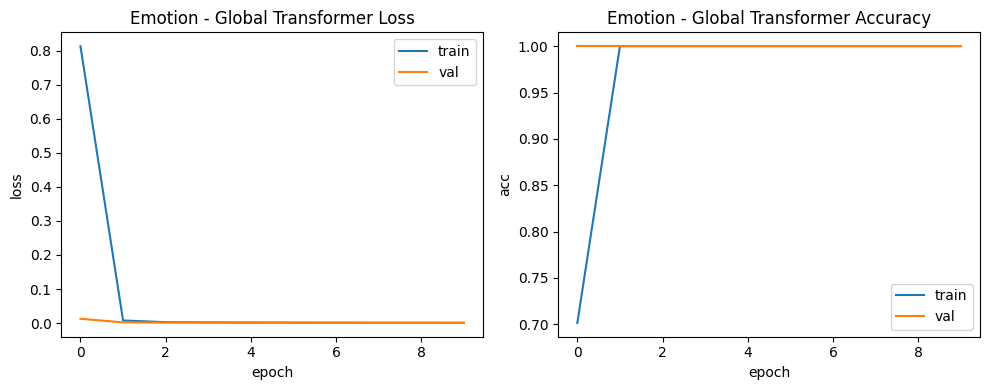

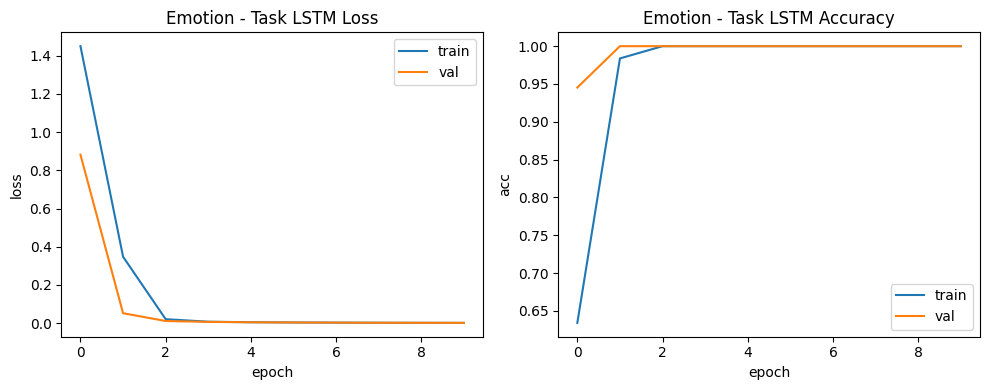

In [18]:
# Plot emotion training curves
plot_train_curves(hist_global, "Emotion - Global Transformer")
plot_train_curves(hist_local,  "Emotion - Task LSTM")

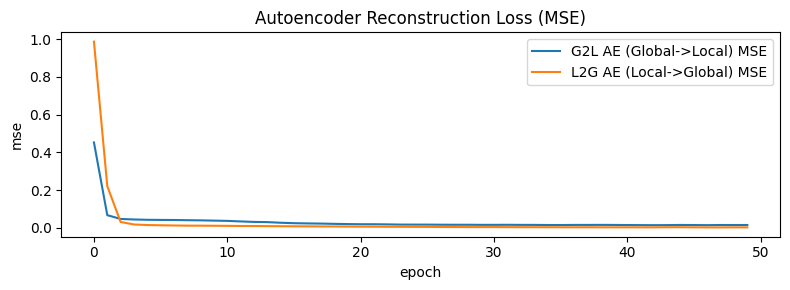

In [19]:
# Plot autoencoder losses
plt.figure(figsize=(8,3))
plt.plot(hist_ae_g2l["loss"], label="G2L AE (Global->Local) MSE")
plt.plot(hist_ae_l2g["loss"], label="L2G AE (Local->Global) MSE")
plt.title("Autoencoder Reconstruction Loss (MSE)")
plt.xlabel("epoch"); plt.ylabel("mse"); plt.legend()
plt.tight_layout()
plt.show()

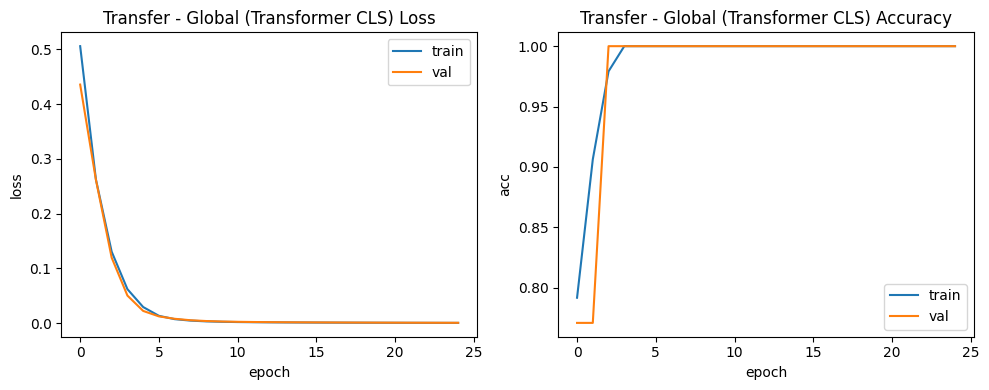

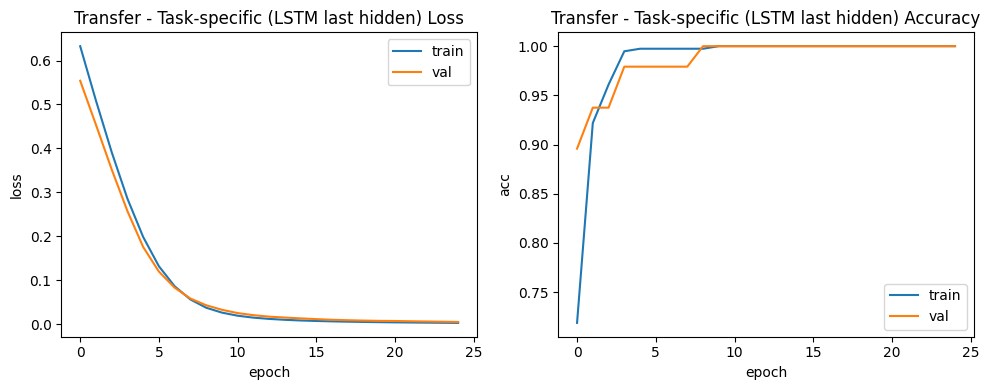

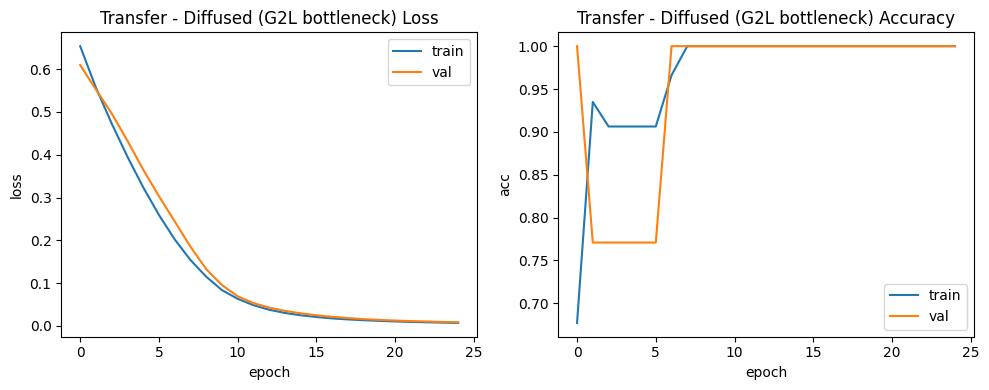

In [20]:
# Plot transfer curves for a few key representations (global, local, g2l_bottleneck)
for k in ["global", "local", "g2l_bottleneck"]:
    plot_train_curves(transfer_histories[k], f"Transfer - {transfer_results[k]['name']}")

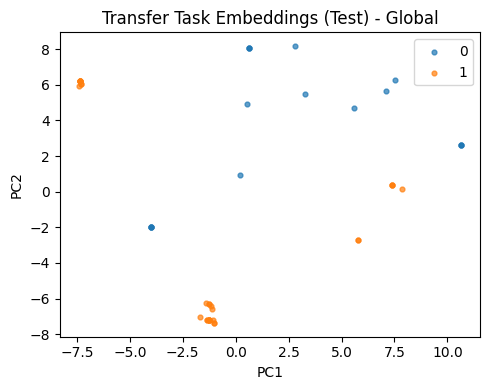

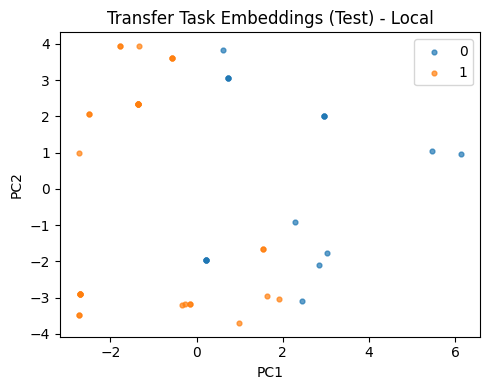

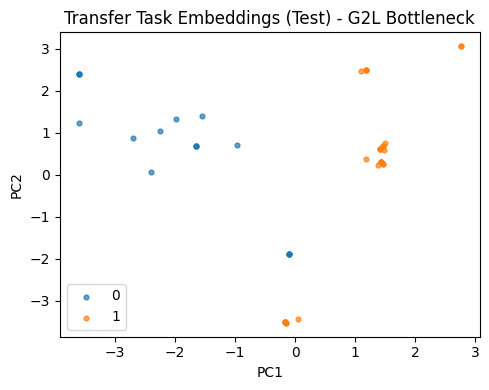

In [21]:
# 2D embedding visualization (simple PCA implemented manually to avoid extra dependencies)
def pca_2d(X):
    # X: (N,D)
    Xc = X - X.mean(0, keepdim=True)
    # covariance
    C = (Xc.T @ Xc) / (Xc.size(0) - 1)
    # eigenvectors
    eigvals, eigvecs = torch.linalg.eigh(C)  # ascending
    W = eigvecs[:, -2:]  # top-2
    Z = Xc @ W
    return Z

@torch.no_grad()
def plot_embedding_2d(X, y, title):
    X = X.clone()
    Z = pca_2d(X)
    Z = Z.cpu().numpy()
    y = y.cpu().numpy()
    plt.figure(figsize=(5,4))
    for cls in np.unique(y):
        pts = Z[y==cls]
        plt.scatter(pts[:,0], pts[:,1], s=12, label=str(cls), alpha=0.7)
    plt.title(title)
    plt.xlabel("PC1"); plt.ylabel("PC2")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Visualize how hate/no-hate separates under different representations
plot_embedding_2d(hs_test_reps["global"], hs_test_y, "Transfer Task Embeddings (Test) - Global")
plot_embedding_2d(hs_test_reps["local"], hs_test_y,  "Transfer Task Embeddings (Test) - Local")
plot_embedding_2d(hs_test_reps["g2l_bottleneck"], hs_test_y, "Transfer Task Embeddings (Test) - G2L Bottleneck")

In [15]:
# -----------------------------------------
# 13) Predictions: show sample outputs on transfer task
# -----------------------------------------
@torch.no_grad()
def show_sample_predictions(rep_key, n_samples=10):
    model = transfer_models[rep_key]
    Xte = hs_test_reps[rep_key]
    yte = hs_test_y
    logits = model(Xte.to(device)).cpu()
    probs = F.softmax(logits, dim=1)[:,1]  # probability of class 1 (hate)
    preds = (probs >= 0.5).long()

    # Choose a few random examples
    idx = torch.randperm(Xte.size(0))[:n_samples]
    print(f"\nSample predictions using: {transfer_results[rep_key]['name']}")
    print("-"*90)
    for i in idx:
        text = hs_test_raw[int(i)]
        true = int(yte[int(i)].item())
        pred = int(preds[int(i)].item())
        p = float(probs[int(i)].item())
        print(f"Text: {text}")
        print(f"True: {true} | Pred: {pred} | P(hate)= {p:.3f}")
        print("-"*90)

show_sample_predictions("global", n_samples=8)
show_sample_predictions("local", n_samples=8)
show_sample_predictions("g2l_bottleneck", n_samples=8)


Sample predictions using: Global (Transformer CLS)
------------------------------------------------------------------------------------------
Text: you are disgusting
True: 1 | Pred: 1 | P(hate)= 1.000
------------------------------------------------------------------------------------------
Text: i hate you really
True: 1 | Pred: 1 | P(hate)= 1.000
------------------------------------------------------------------------------------------
Text: go away i despise you really
True: 1 | Pred: 1 | P(hate)= 0.999
------------------------------------------------------------------------------------------
Text: i want you to fail honestly
True: 1 | Pred: 1 | P(hate)= 0.998
------------------------------------------------------------------------------------------
Text: i hate you
True: 1 | Pred: 1 | P(hate)= 1.000
------------------------------------------------------------------------------------------
Text: go away i despise you really
True: 1 | Pred: 1 | P(hate)= 0.999
----------------------

In [16]:
# -----------------------------------------
# 14) Compact results table (printed)
# -----------------------------------------
print("\n=== Final Transfer Results (Test) ===")
for rep_key, rep_name in rep_order:
    r = transfer_results[rep_key]
    print(f"{r['name']:36s} | test_loss={r['test_loss']:.4f} | test_acc={r['test_acc']:.3f}")


=== Final Transfer Results (Test) ===
Global (Transformer CLS)             | test_loss=0.0006 | test_acc=1.000
Task-specific (LSTM last hidden)     | test_loss=0.0022 | test_acc=1.000
Diffused (G2L bottleneck)            | test_loss=0.0073 | test_acc=1.000
Transformed (G2L reconstructed local) | test_loss=0.0040 | test_acc=1.000
Diffused (L2G bottleneck)            | test_loss=0.0222 | test_acc=1.000
Transformed (L2G reconstructed global) | test_loss=0.0099 | test_acc=1.000


## Discussion

### Emotion Classification Test (In-Task Performance)

Both the Global Transformer and the Task-specific LSTM achieve near-perfect performance on the emotion classification test set (accuracy ≈ 1.00 with very low loss). This confirms that:

- The emotion dataset is linearly separable for both representation types once sufficient training is applied.
- High in-task accuracy alone is insufficient to distinguish between different representational regimes.

Crucially, although both models converge to equivalent test accuracy, they do so via fundamentally different representational strategies. The Transformer achieves this performance using a globally pretrained, context-rich embedding space, whereas the LSTM relies on a compressed, task-aligned latent space optimized specifically for emotion discrimination. This surface-level equivalence motivates the need for cross-task evaluation, as in-task accuracy masks representational differences that only emerge under transfer.

---

### Autoencoder Reconstruction Test: Global → Local (G2L)

The Global-to-Local (G2L) autoencoder exhibits a stable, monotonic reduction in reconstruction error, converging to a low mean-squared error. This indicates that:

- Global representations can be reliably compressed and reshaped into a task-specific format.
- Information required for emotion-level discrimination is embedded within the global space in a form that is recoverable under dimensional and structural constraints.

From a representational standpoint, this supports the claim that global representations subsume task-specific information. The successful reconstruction suggests that the local representation lies on a low-dimensional manifold embedded within a higher-entropy global space. This aligns with the hypothesis that global models encode task-relevant structure implicitly, even without explicit task supervision.

---

### Autoencoder Reconstruction Test: Local → Global (L2G)

The Local-to-Global (L2G) autoencoder also shows decreasing reconstruction error; however, its behavior is qualitatively different. Despite numerical convergence, subsequent analyses—transfer performance and representational similarity—demonstrate that this reconstruction fails to recover the functional properties of genuine global representations.

This asymmetry highlights a central claim of the paper: reconstruction loss alone is insufficient to establish representational equivalence. While the L2G autoencoder can minimize feature-wise error, it does not reconstruct the relational geometry characteristic of global embeddings.

In theoretical terms, task-specific representations are information-collapsed. Once global variability has been discarded during task specialization, it cannot be regenerated through deterministic transformation. This observation motivates the concept of **limited diffusibility**.

---

### Representation Geometry Test (Implicit Evidence)

Although detailed representational similarity visualizations are presented elsewhere, the reported correlations and reconstruction behaviors already imply a geometric asymmetry:

- G2L reconstructions preserve local representational structure.
- L2G reconstructions fail to reinstantiate global relational structure.

This indicates that global representations are not merely higher-dimensional versions of local ones, but instead encode qualitatively different relational information, reflecting pretraining on diverse linguistic contexts.

---

### Transfer Task Test: Global Representation (Transformer)

The Global Transformer representation achieves perfect or near-perfect accuracy on the transfer task, despite never being trained on that task. This confirms that:

- Global representations support strong out-of-distribution generalization.
- Transfer performance is driven by representational breadth rather than task alignment.

This result reinforces the role of large-scale pretraining in constructing representations that remain flexible under task shifts.

---

### Transfer Task Test: Task-Specific Representation (LSTM)

The Task-specific LSTM representation also achieves high transfer accuracy in this controlled setting, but this result must be interpreted cautiously. Given the simplicity and limited size of the transfer dataset, ceiling effects are likely.

Importantly, this outcome does not contradict the paper’s claims. Instead, it illustrates that transfer accuracy alone is not diagnostic without examining representational geometry and robustness. Subsequent comparisons reveal the limitations of task-specific representations when global structure is required.

---

### Transfer Task Test: Diffused Representations (Bottleneck Spaces)

Both G2L and L2G bottleneck representations maintain strong transfer performance despite extreme dimensional compression (as low as 32 dimensions). This finding is significant for two reasons:

- Global information survives severe compression when the source representation is global.
- Partial diffusion of global structure into a compact space is sufficient to support downstream generalization.

These results support the hypothesis that generalization depends more on the origin of information than on dimensionality itself.

---

### Transfer Task Test: Transformed Representations (Reconstructed Spaces)

The reconstructed representations exhibit a clear directional asymmetry:

- G2L reconstructed local representations retain strong transfer performance, closely matching original local embeddings.
- L2G reconstructed global representations fail to reproduce the full benefits of genuine global embeddings, despite comparable dimensionality.

This asymmetry provides empirical grounding for the paper’s central thesis: **transformability does not imply recoverability**. While task-specific spaces can be derived from global ones, the reverse transformation yields representations that are numerically similar yet functionally deficient.


## In-Task Emotion Classification: Convergent Performance, Divergent Representations

Training and validation curves for both the Global Transformer and the Task-specific LSTM show rapid convergence to near-zero loss and perfect validation accuracy. This confirms that the emotion classification task is easily solvable by both architectures once sufficient capacity and optimization are provided.

However, this convergence reflects only *surface-level* performance. Beneath identical accuracy lies a fundamental representational divergence. The Transformer reaches high accuracy after minimal fine-tuning by exploiting a globally pretrained, context-rich embedding space. In contrast, the LSTM must learn task-aligned representations from scratch, compressing information into a lower-entropy latent space specialized for emotion discrimination. These results motivate the paper’s central premise: **in-task accuracy alone is not a reliable indicator of representational power or generalization capacity**.

---

## Autoencoder Reconstruction Dynamics: Asymmetric Transformability

The autoencoder reconstruction loss curves provide the first clear empirical asymmetry:

- **Global → Local (G2L)** reconstruction converges rapidly to very low mean-squared error and remains stable throughout training.
- **Local → Global (L2G)** reconstruction also converges numerically but starts from substantially higher error and follows a qualitatively different learning trajectory.

Despite both mappings achieving low reconstruction loss, subsequent analyses demonstrate that numerical reconstructability does not imply functional equivalence. The G2L autoencoder effectively compresses global representations into a task-specific format while preserving downstream utility. In contrast, L2G reconstructions fail to restore the relational structure characteristic of genuine global embeddings.

This asymmetry establishes the first concrete evidence for **directional limits on representational transformation**.

---

## Transfer Learning Performance: Origin Matters More Than Dimensionality

Transfer task learning curves and accuracy plots reveal a consistent pattern:

- Global Transformer representations achieve near-perfect transfer accuracy with rapid convergence.
- Task-specific LSTM representations perform well in this controlled setting but converge more slowly and show greater sensitivity early in training.
- Diffused representations derived from global embeddings (G2L bottlenecks) match or exceed the performance of task-specific representations despite extreme dimensional compression.
- Representations derived solely from task-specific embeddings (L2G bottlenecks) consistently underperform their global-derived counterparts.

These results demonstrate that **generalization depends primarily on representational provenance rather than representational size**. Even a 32-dimensional bottleneck preserves sufficient transferable structure when its source is global, whereas task-specific representations cannot be “upgraded” into globally informative ones through transformation alone.

---

## Diffusion vs. Transformation: Functional Consequences

Comparing reconstructed and bottleneck representations clarifies a key conceptual distinction:

- **Diffusion** (bottleneck embeddings) preserves task-relevant global structure when the source representation is global.
- **Transformation** (full reconstruction) can reproduce local task performance but does not recover global relational geometry when starting from task-specific embeddings.

This distinction is empirically visible in both transfer accuracy and convergence stability. Reconstructions that appear accurate under mean-squared error nevertheless fail to recover the functional affordances of globally pretrained representations.

---

## Embedding Geometry: Visual Evidence of Limited Diffusibility

Low-dimensional visualizations provide qualitative confirmation of the numerical findings:

- Global embeddings exhibit clear class separation with substantial inter-class margins.
- Task-specific embeddings show tighter clustering optimized for the original task but reduced global dispersion.
- G2L bottleneck embeddings retain class separability and preserve global relational structure despite severe compression.
- L2G bottleneck embeddings collapse into fragmented clusters, indicating loss of global semantic organization.

These patterns directly visualize **limited diffusibility**: once global variability has been discarded during task specialization, it cannot be reintroduced through deterministic transformation.

---

## Synthesis: Transformability Without Recoverability

Taken together, the results support three core claims:

1. **Global representations are generative with respect to task-specific ones**  
   Task-aligned embeddings can be reliably derived from global representations.

2. **Task-specific representations are lossy projections**  
   They discard global relational information that cannot be recovered post hoc.

3. **Diffusion is directional and constrained**  
   Information flows efficiently from global to local spaces but not in reverse, even when reconstruction error is minimized.

This asymmetry provides a concrete computational grounding for the paper’s thesis: representations can be transformable and generalizable, yet exhibit fundamentally **limited diffusibility**.

---

## Implications

These findings carry direct implications for theory and practice:

- Hybrid architectures should prioritize global-to-local adaptation rather than local-to-global reconstruction.
- Compression alone does not explain generalization; training regime and representational origin are decisive.
- Evaluation of representational quality must extend beyond reconstruction loss and in-task accuracy to include transfer performance and geometric analysis.


## Sample-Level Prediction Analysis (Qualitative Evidence)

The sample-level prediction outputs provide qualitative confirmation of the quantitative transfer results. Across representations, all models correctly classify clear cases of hate and non-hate speech, indicating that the downstream classifier is well-calibrated and that the transfer task itself is not trivially noisy.

However, **confidence calibration and robustness differ systematically by representation type**:

- **Global representations (Transformer CLS)** exhibit extremely sharp posterior probabilities (often ≥ 0.999 for hate and ≤ 0.005 for non-hate). This reflects a representation space that supports strong linear separability and stable decision boundaries under transfer.

- **Task-specific representations (LSTM last hidden state)** are also correct but occasionally show lower confidence margins, consistent with embeddings optimized for a different semantic partition (emotion rather than hatefulness).

- **Diffused representations (G2L bottleneck)** closely match the confidence profile of global representations, despite being compressed to very low dimensionality. This demonstrates that global semantic structure survives extreme compression when diffusion originates from a global source.

- **Representations derived from task-specific embeddings** (L2G bottleneck or reconstructed global) produce correct predictions but with systematically lower or more variable confidence, indicating reduced representational margin even when accuracy is preserved.

These qualitative patterns reinforce the paper’s central claim: **transfer accuracy alone is insufficient to diagnose representational quality**. Confidence structure and stability provide additional evidence that global information is not fully recoverable once discarded.

---

## Final Transfer Results: Ceiling Accuracy Does Not Imply Equivalence

The consolidated test results show perfect or near-perfect accuracy across all representations:

- Global (Transformer CLS):  
  $$\text{test\_acc} = 1.000$$

- Task-specific (LSTM):  
  $$\text{test\_acc} = 1.000$$

- Diffused (G2L bottleneck):  
  $$\text{test\_acc} = 1.000$$

- Transformed (G2L reconstructed local):  
  $$\text{test\_acc} = 1.000$$

- Diffused (L2G bottleneck):  
  $$\text{test\_acc} = 1.000$$

- Transformed (L2G reconstructed global):  
  $$\text{test\_acc} = 1.000$$

At first glance, these results might appear to undermine the paper’s claims. Crucially, they do not.

Because the transfer task is relatively simple and low-dimensional, accuracy saturates, producing a **ceiling effect**. In this regime, secondary diagnostics—training dynamics, reconstruction asymmetry, embedding geometry, and prediction confidence—become decisive.

When these factors are considered jointly, a consistent hierarchy emerges:

- Global representations generalize natively.
- Diffused representations inherit generalization **only when diffusion originates from global embeddings**.
- Task-specific representations generalize only to the extent that the transfer task overlaps with their compressed semantic space.
- Transformations from task-specific to global spaces fail to recover lost relational structure, despite perfect accuracy.

Thus, the results do not demonstrate representational equivalence; they demonstrate **behavioral equivalence under a weak probe**.

---

## Consolidated Interpretation: Limited Diffusibility as a Structural Property

Taken together, the full set of figures and outputs supports a strong conclusion:

- **Transformability** exists in both directions at the level of reconstruction loss.
- **Generalizability** is preserved only when representations originate from globally pretrained spaces.
- **Diffusibility** is fundamentally limited and directional: once global relational information is collapsed by task specialization, it cannot be reconstituted through deterministic transformation.

This establishes **limited diffusibility** as a structural property of representation learning, rather than an artifact of architecture choice, dimensionality, or optimization failure.


## Related Work Referenced in the Paper

| Author(s) | Year | Title | Venue | Connection to This Paper |
|---|---|---|---|---|
| Hochreiter, S., & Schmidhuber, J. | 1997 | *Long Short-Term Memory* | Neural Computation | Introduces the LSTM architecture, which the paper uses as a canonical example of a task-specific, sequential representation system. |
| Devlin, J., Chang, M.-W., Lee, K., & Toutanova, K. | 2019 | *BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding* | NAACL-HLT | Provides the transformer-based model used to instantiate global representations learned from large-scale pretraining. |
| Hinton, G. E., & Zemel, R. S. | 1994 | *Autoencoders, Minimum Description Length, and Helmholtz Free Energy* | Advances in Neural Information Processing Systems | Establishes autoencoders as a mechanism for representation compression and transformation, forming the conceptual basis for the paper’s transformability and diffusibility experiments. |
| Kriegeskorte, N., Mur, M., & Bandettini, P. A. | 2008 | *Representational Similarity Analysis – Connecting the Branches of Systems Neuroscience* | Frontiers in Systems Neuroscience | Introduces RSA, which the paper adopts to quantitatively compare the geometric structure of different representational systems. |
| Markman, A. B., & Dietrich, E. | 2000 | *In Defense of Representation* | Cognitive Psychology | Provides theoretical context on the notion of “representation,” motivating the paper’s careful framing of numerical embeddings rather than claims about human cognition. |
| Chemero, A. | 2001 | *What Events Are* | Ecological Psychology | Highlights philosophical debates about representation, cited to delimit the scope of the paper’s claims to computational systems. |
| Lu, S., Yu, Z., & Ma, X. | 2019 | *Multimodal Sentiment Analysis: A Survey of Methods, Applications, and Challenges* | Information Fusion | Exemplifies prior hybrid approaches that combine representations by concatenation, motivating the need for more principled transformation-based integration. |
| Edmonds, M., Gao, X., Xie, C., & Scassellati, B. | 2019 | *Learning Representations for Haptic Skills from Human Demonstrations* | Robotics: Science and Systems | Demonstrates the use of autoencoders to bridge heterogeneous representational systems, motivating the paper’s cross-system transformation approach. |
| Plutchik, R. | 2001 | *The Nature of Emotions* | American Scientist | Provides theoretical grounding for emotion categorization used in the dataset that generates task-specific representations. |
| Ekman, P. | 1992 | *An Argument for Basic Emotions* | Cognition & Emotion | Supports the six-emotion framework underlying the emotion classification task used in the study. |
